This notebook defines a very simple Bayesian linear regression model. Given observed data $x_1, \cdots, x_{10} \in \real^2$ and $y_1, \cdots, y_{10} \in \real$, the model is:

$$\tau \sim \mathrm{Uniform}(0,10)$$

$$z_i \sim \mathrm{Normal}(0,10), \quad i \in \{1,2\}$$

$$y_n \sim \mathrm{Normal}(z ^\top x_n, \tau), \quad n \in \{1, \cdots, 10\}$$

In [1]:
import pangolin
from pangolin import interface as pi
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# parameters
ndim = 2
ndata = 10

In [3]:
# generate synthetic data (no pangolin)
x = np.random.randn(ndata, ndim)
noise_true = np.random.rand() * 5
z_true = np.random.randn(ndim) * 5
y_obs = np.array([z_true @ xi + noise_true * np.random.randn() for xi in x])
print(f'{z_true=}')
print(f'{x.shape=}')
print(f'{noise_true=}')
print(f'{y_obs.shape=}')

z_true=array([-3.91933049,  6.81635139])
x.shape=(10, 2)
noise_true=0.9769459511825423
y_obs.shape=(10,)


In [4]:
# define probabilistic model (pangolin)
z = pi.vmap(pi.normal, None, 2)(0, 10)
noise = pi.uniform(0, 5)
y = pi.vmap(lambda xi: pi.normal(z @ xi, noise))(x)

print(f'{z.shape=}')
print(f'{noise.shape=}')
print(f'{y.shape=}')

z.shape=(2,)
noise.shape=()
y.shape=(10,)


In [5]:
# do inference (pangolin)
[z_samps, noise_samps] = pangolin.blackjax.sample([z, noise], y, y_obs)
print(f'{z_samps.shape=}')
print(f'{noise_samps.shape=}')

z_samps.shape=(1000, 2)
noise_samps.shape=(1000,)


In [6]:
# print stats (no pangolin)
print(f'sampled z mean: {np.mean(z_samps,axis=0)}')
print(f'sampled z std:  {np.std(z_samps,axis=0)}')
print(f'true z:         {z_true}')
print('')
print(f'sampled noise mean: {np.mean(noise_samps)}')
print(f'sampled noise std:  {np.std(noise_samps)}')
print(f'true noise:         {noise_true}')

sampled z mean: [-4.4634686  7.335775 ]
sampled z std:  [0.666558   0.43342122]
true z:         [-3.91933049  6.81635139]

sampled noise mean: 1.4242573976516724
sampled noise std:  0.47322967648506165
true noise:         0.9769459511825423


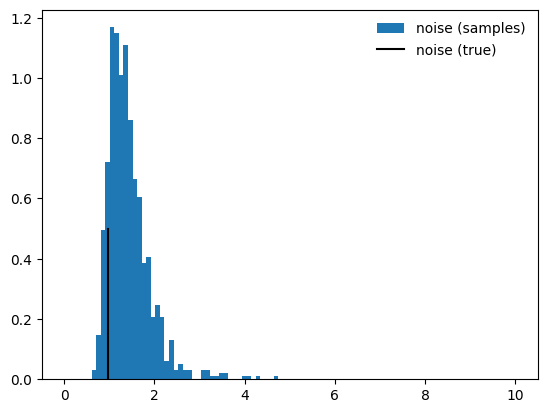

In [7]:
# plot sampled noise (no pangolin)
plt.hist(noise_samps, np.linspace(0,10,100), density=True, label=f'noise (samples)');
plt.plot([noise_true, noise_true], [0,0.5], 'k-',label=f'noise (true)')
plt.legend(frameon=False,loc='upper right');

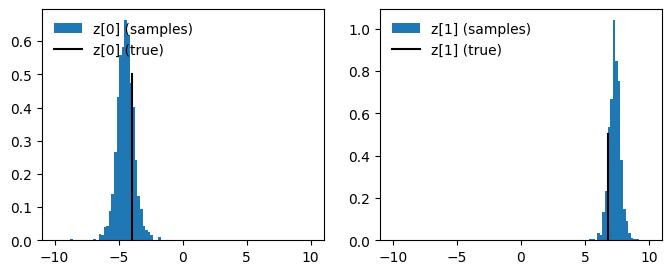

In [8]:
# plot sampled z marginals (no pangolin)
plt.figure(figsize=(8,3))
for i in range(2):
    plt.subplot(1,2,1+i)
    plt.hist(z_samps[:,i], np.linspace(-10,10,100), density=True, label=f'z[{i}] (samples)');
    plt.plot([z_true[i], z_true[i]],[0,0.5],'k-',label=f'z[{i}] (true)')
    plt.legend(frameon=False,loc='upper left')

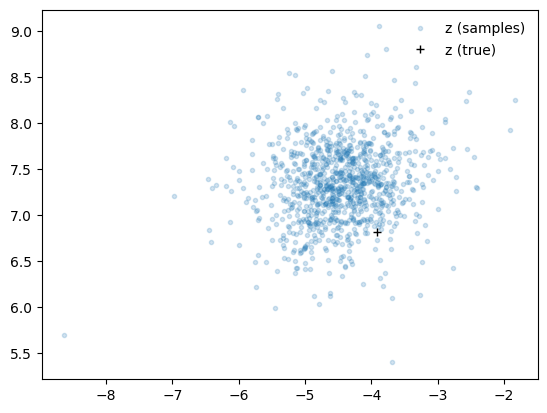

In [10]:
# plot joint z samples (no pangolin)
plt.plot(z_samps[:,0],z_samps[:,1],'.',alpha=0.2, label='z (samples)')
plt.plot(z_true[0], z_true[1], 'k+', label='z (true)');
plt.legend(frameon=False);